# Seperating stock to forcast for certain dates depending on the product

In [1]:
%pip install nbformat pandas numpy matplotlib seaborn scikit-learn xgboost


[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
import sys
sys.path.append('../../src')

In [4]:
from data_config import ProductHandler as ph

/Users/mwilko777/Desktop/Project/Software Artifact/notebooks/neural_network/../../src/datasets.py:13: DtypeWarning: Columns (4,6,20,50,52) have mixed types. Specify dtype option on import or set low_memory=False.
  products_s = pd.read_csv(
/Users/mwilko777/Desktop/Project/Software Artifact/notebooks/neural_network/../../src/datasets.py:15: DtypeWarning: Columns (5,29,42,48) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_i = pd.read_csv(
/Users/mwilko777/Desktop/Project/Software Artifact/notebooks/neural_network/../../src/datasets.py:18: DtypeWarning: Columns (43,57,106,141,146,211,212,247,255,294,298,316,327,332,350,354) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_m = pd.read_csv(
/Users/mwilko777/Desktop/Project/Software Artifact/notebooks/neural_network/../../src/datasets.py:21: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  sp_inv_adds = pd.read_c

----- DROP BOOLEAN AND NULL COLUMNS (NOT NEEDED) -----

Merged Data - Columns to be dropped (Missing Vals): ['BackStage_DefaultReportForm', 'BackStage_SmartMarkSet', 'BillCounty', 'CoreType', 'EndUserNum', 'EndUserPO', 'Equip3_ID', 'Equip3_Status', 'Est_v_Act_Notes', 'Ink_Status', 'JDF_Note_to_DFE', 'JDF_Send_Msg', 'MiscChargeDesc1', 'MiscChargeDesc2', 'MiscChargeDesc3', 'MiscChargeDesc4', 'PlateStat', 'ProofStat', 'Roto_CEL_Product_ID', 'Roto_Quote_Line_ID', 'Roto_Quote_Number', 'Schedule_Status', 'ShipAttn_EmailAddress', 'ShipCounty', 'ShipStat', 'Tag_x', 'Tool3Descr', 'Tool4Descr', 'Tool5Descr', 'ToolNo3', 'ToolNo4', 'ToolNo5', 'ToolStat', 'UserDef_MR_1_Lb', 'UserDef_MR_2_Lb', 'Assigned', 'Desc2_x', 'ediLineNumber', 'eTraxx_Customer_Notes', 'Location_x', 'PO_Number', 'Adhesive', 'Alternate', 'eTraxx_Forecast_Range', 'Material', 'Tag_y', 'UPC']

Merged Data - Columns to be dropped (All cols with rows same vals): ['Act_OTHER_Hours', 'ActArtwork', 'ActFinMaterial', 'ActPostPressHours',

/Users/mwilko777/Desktop/Project/Software Artifact/notebooks/neural_network/../../src/datasets.py:108: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['OrderDate'] = pd.to_datetime(
/Users/mwilko777/Desktop/Project/Software Artifact/notebooks/neural_network/../../src/datasets.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['OrderDate'] = pd.to_datetime(
/Users/mwilko777/Desktop/Project/Software Artifact/notebooks/neural_network/../../src/datasets.py:110: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing i

In [5]:
ph.custom_prod_set()

All custom codes for existing products: 
{'109', '021', '523', '533', '68U', '088', 'D-T', '437', 'AC-', '05V', '53V', '412', '963', 'OU-', '617', '843', '32S', '384', '610', '07R', '796', 'LIT', 'PCP', '84Y', '46X', '674', '673', '701', '17Z', 'DSF', '56U', '31T', '14U', '54T', '91X', '568', 'HOP', '671', 'RAN', 'PF-', '77Y', '155', 'GOR', '63R', '276', '866', '371', 'OS-', '576', '255', 'OP-', 'LJC', '945', '253', '809', '5Z ', 'GOT', '92X', '9-0', '340', '808', '927', '43V', 'RX-', 'E-P', 'PLE', '369', '328', '281', '753', 'CMI', 'ND-', '35-', '08T', '474', '98V', '694', '297', 'MW-', 'QUI', '4Y-', '805', 'SBC', '947', '93Z', 'ST-', '41U', 'F-T', '246', 'GOL', '759', 'OR-', '692', 'B-0', '34V', '62W', '455', '607', '43U', '752', 'JUR', 'LEM', '487', '8Z-', '877', '229', '151', '173', 'JC-', '67U', '178', '767', 'PRT', '345', '586', '331', 'COR', '79R', '17S', 'PRX', '524', '735', '221', 'SUP', '137', '416', '-SO', 'MAZ', '74X', '519', '10X', 'RR-', '397', '587', 'EL-', '394', 'NEL',

In [6]:
# # display the highest order quantity customers 
# ph.highest_customs()

In [7]:
# define the features and target variable from 'product_sales'
# CHANGE THE CUSTOMER CODE HERE >>>>>>>>>>
custom_code_df = pd.DataFrame(ph.get_custom_code_data('MOM'))

# customer code for later referencing
custom_ref = custom_code_df.loc[0, 'ProductNumber'][:3].lower().upper()
print(custom_ref)

custom_code_df.head()

MOM


,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,MOM-005-0018Z,2022,3,10,2,0,241.0,94500,117000.00000,117000.00000,...,105000.0,84000.0,84000.0,84000.0,94500,0,0,-100.0,NaN,0
1,MOM-005-0018Z,2022,3,13,0,0,241.0,117000,103500.00000,103500.00000,...,98500.0,81375.0,81375.0,81375.0,117000,0,0,-100.0,NaN,0
2,MOM-005-0018Z,2022,4,16,3,0,241.0,103500,75000.00000,75000.00000,...,69500.0,69500.0,69500.0,69500.0,103500,0,0,-100.0,NaN,0
3,MOM-005-0018Z,2023,10,40,3,0,241.0,75000,30000.00000,30000.00000,...,52500.0,52500.0,52500.0,52500.0,0,75000,0,inf,-100.0,0
4,MOM-005-0018Z,2024,1,2,4,0,241.0,30000,110031.53337,110031.53337,...,30000.0,30000.0,30000.0,30000.0,0,0,30000,NaN,inf,0


In [8]:
from scipy import stats

# Define a function to compute z-scores within each product group
def compute_zscore(group, threshold=3):
    # Only compute z-score if there are at least 2 data points in the group
    if len(group) >= 2:
        group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
    else:
        group['z_score'] = 0  # or np.nan if preferred
    return group

# Group by "ProductNumber" and compute z-scores for "OrderQuantity" within each group
df_grouped = custom_code_df.groupby('ProductNumber').apply(compute_zscore)

# Define your threshold for what constitutes an "unusually high" order
z_threshold = 3

# Filter for outliers (orders with a z_score greater than the threshold)
df_outliers = df_grouped[df_grouped['z_score'] > z_threshold]

# Display the results
print("Unusually high order quantities (per ProductNumber):")
print(df_outliers[['ProductNumber', 'OrderQuantity', 'z_score']])

print(f'Dropping: \n{df_outliers.count()}')
# Keep only rows where the z-score is within the acceptable range
df_cleaned = df_grouped[df_grouped['z_score'] <= z_threshold].drop(columns=['z_score'])

# Reset index for clarity
df_cleaned.reset_index(drop=True, inplace=True)

custom_code_df = df_cleaned


Unusually high order quantities (per ProductNumber):
                    ProductNumber  OrderQuantity   z_score
ProductNumber                                             
MOM-005-0023Z 46    MOM-005-0023Z         891000  3.044120
MOM-005-0024Z 128   MOM-005-0024Z        1680000  3.066318
MOM-005-0025Z 147   MOM-005-0025Z        2400000  3.517010
MOM-005-0026Z 149   MOM-005-0026Z         117000  3.035020
MOM-005-0029Z 185   MOM-005-0029Z         342000  3.204439
MOM-005-0030Z 198   MOM-005-0030Z        1872000  3.052573
              199   MOM-005-0030Z        2070000  3.493025
MOM-005-0036Z 350   MOM-005-0036Z         378000  3.017665
MOM-005-0038Z 387   MOM-005-0038Z         370000  3.272953
MOM-005-0040Z 435   MOM-005-0040Z         270000  3.824927
MOM-005-0041Z 459   MOM-005-0041Z         180000  3.347375
MOM-005-0042Z 479   MOM-005-0042Z         450000  3.133242
MOM-005-0045Z 532   MOM-005-0045Z          90000  3.222736
MOM-005-0077Z 792   MOM-005-0077Z         180000  3.087938
MOM

/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_87211/1363007664.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = custom_code_df.groupby('ProductNumber').apply(compute_zscore)


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [10]:
df = custom_code_df

features = ['ProductNumber', 'order_month',
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
            ]
target = 'OrderQuantity'

X = df[features]
y = df[target]

# one-hot encoding for categorical features
categorical_features = ['ProductNumber']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# preprocessor (keeps numerical features as is)
preprocessor = ColumnTransformer(
    transformers=[
        # one-hot encode categorical features
        ('cat', encoder, categorical_features)
    ], remainder='passthrough'
)

# transform the features
X_transformed = preprocessor.fit_transform(X)

In [11]:
customer_total = df.copy()

# define features and target
features = ['ProductNumber', 'order_month', 'order_week', 'order_weekday',
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
           ]
target = 'OrderQuantity'


# filter the top products
total_X = customer_total[features]  # Features from top products
total_y = customer_total[target]    # Target variable

# # Scale Target Variable (y)
# total_y_scaler = StandardScaler()
# total_y = total_y_scaler.fit_transform(total_y.values.reshape(-1, 1)).flatten()

# define categorical and numeric features
categorical_features = ['ProductNumber']
numeric_features = list(set(features) - set(categorical_features))  # All other features are numeric

# Define transformations
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

# ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_features),   # One-hot encode categorical features
        ('num', scaler, numeric_features)        # Standardize numeric features
    ]
)

# Train-test split
total_X_train, total_X_val, total_y_train, total_y_val = train_test_split(total_X, total_y, test_size=0.2, random_state=42)

# Transform the features
total_X_train_transformed = preprocessor.fit_transform(total_X_train)
total_X_val_transformed = preprocessor.transform(total_X_val)

# Output the shape
print(f"Train Shape: {total_X_train_transformed.shape}, Validation Shape: {total_X_val_transformed.shape}")
print("Feature processing for top products completed successfully!")

customer_total.head()

Train Shape: (2144, 309), Validation Shape: (536, 309)
Feature processing for top products completed successfully!


,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,MOM-005-0018Z,2022,3,10,2,0,241.0,94500,117000.00000,117000.00000,...,105000.0,84000.0,84000.0,84000.0,94500,0,0,-100.0,NaN,0
1,MOM-005-0018Z,2022,3,13,0,0,241.0,117000,103500.00000,103500.00000,...,98500.0,81375.0,81375.0,81375.0,117000,0,0,-100.0,NaN,0
2,MOM-005-0018Z,2022,4,16,3,0,241.0,103500,75000.00000,75000.00000,...,69500.0,69500.0,69500.0,69500.0,103500,0,0,-100.0,NaN,0
3,MOM-005-0018Z,2023,10,40,3,0,241.0,75000,30000.00000,30000.00000,...,52500.0,52500.0,52500.0,52500.0,0,75000,0,inf,-100.0,0
4,MOM-005-0018Z,2024,1,2,4,0,241.0,30000,110031.53337,110031.53337,...,30000.0,30000.0,30000.0,30000.0,0,0,30000,NaN,inf,0


In [12]:
from model_utils import *

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define features and target
features = ['ProductNumber', 'order_month', 'order_week', 'order_weekday',
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024']
target = 'OrderQuantity'

# Prepare data
X = df[features]
y = df[target]

# Log-transform features
log_features = ['log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m']
X[log_features] = X[log_features].apply(lambda x: np.log1p(x))  # log(1 + x) to handle zeros

# Scale Target Variable (y)
y_scaler = StandardScaler()
y = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Define categorical and numeric features
categorical_features = ['ProductNumber']
numeric_features = [col for col in features if col not in categorical_features]

# Preprocessing pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ]
)

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the pipeline
mlp_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('mlp', MLPRegressor(
        hidden_layer_sizes=(256, 128, 64),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        learning_rate_init=0.005,
        max_iter=2000,
        early_stopping=True,
        random_state=42))
])

# Train the model
mlp_pipeline.fit(X_train, y_train)

# Evaluate model using the imported function
train_metrics = evaluate_model_advanced(mlp_pipeline, X_train, y_train, y_scaler)
test_metrics = evaluate_model_advanced(mlp_pipeline, X_val, y_val, y_scaler)

# Print results
metrics = {'Neural Network': test_metrics}
metrics_df = pd.DataFrame(metrics).T
metrics_df = metrics_df[['MAE', 'MSE', 'RMSE', 'R²']]

print('\nFINAL METRICS SUMMARY:')
print(metrics_df)


/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_87211/3170989252.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[log_features] = X[log_features].apply(lambda x: np.log1p(x))  # log(1 + x) to handle zeros



FINAL METRICS SUMMARY:
                         MAE           MSE          RMSE        R²
Neural Network  18662.363111  1.281545e+09  35798.679529  0.966581


In [14]:
test_metrics

{'MAE': 18662.363111461058,
 'MSE': 1281545456.0024023,
 'RMSE': 35798.6795287536,
 'R²': 0.9665808231103714}

In [15]:
train_metrics

{'MAE': 6507.66500821426,
 'MSE': 139311053.10673255,
 'RMSE': 11803.01034087205,
 'R²': 0.9968987706854769}

In [16]:
mlp_pipeline.fit(total_X_train, total_y_train)

# Evaluate model using the imported function
total_train_metrics = evaluate_model(mlp_pipeline, total_X_train, total_y_train)
total_test_metrics = evaluate_model(mlp_pipeline, total_X_val, total_y_val)

Mean Absolute Error (MAE): 7952.1958
Mean Squared Error (MSE): 331441371.3218
Root Mean Squared Error (RMSE): 18205.5313
R-squared (R²): 0.9926
Mean Absolute Error (MAE): 21113.8525
Mean Squared Error (MSE): 1533819975.6129
Root Mean Squared Error (RMSE): 39164.0138
R-squared (R²): 0.9600


In [17]:
# Create a DetailedOrderDate column using week and weekday information.
# Adjust the format as needed based on your data.
df['DetailedOrderDate'] = pd.to_datetime(
    df['order_year'].astype(str) +
    df['order_week'].astype(str).str.zfill(2) +
    df['order_weekday'].astype(str),
    format='%Y%W%w'
)

# Filter the data for December 2024 using DetailedOrderDate
dec_2024_data = df[
    (df['DetailedOrderDate'].dt.year == 2024) &
    (df['DetailedOrderDate'].dt.month == 12)
]

In [18]:
import matplotlib.dates as mdates

# Ensure the plot dates are in datetime format
plot_dates = df.loc[X_val.index, 'DetailedOrderDate']  # FIXED: Used X_val.index instead of y_val.index
if not pd.api.types.is_datetime64_any_dtype(plot_dates):
    plot_dates = pd.to_datetime(plot_dates)

# Get model predictions
y_train_pred = mlp_pipeline.predict(X_train)
y_val_pred = mlp_pipeline.predict(X_val)

# Use the 'total' for predictions for better idea on dashboards
total_y_train_pred = mlp_pipeline.predict(total_X_train)
total_y_val_pred = mlp_pipeline.predict(total_X_val)


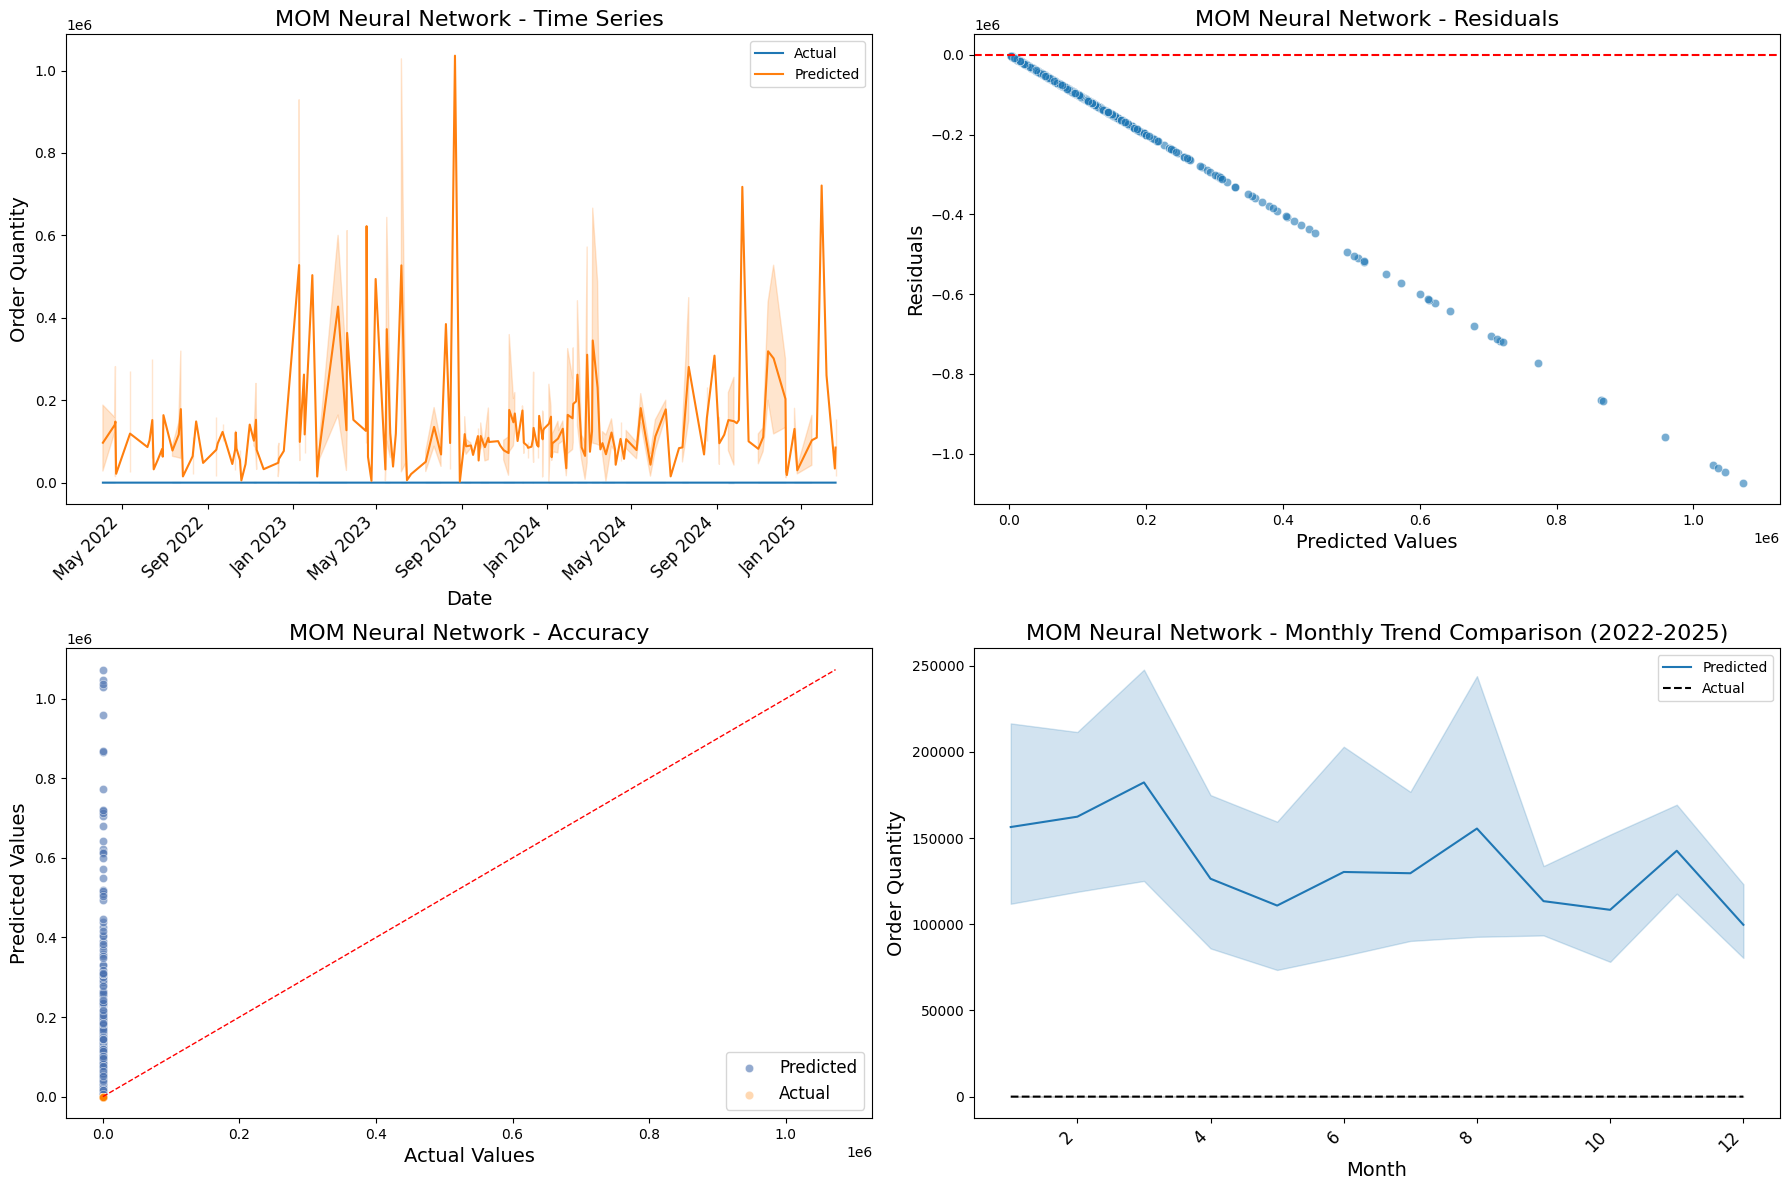

In [19]:
# Create subplots (2 rows, 2 columns: one for line plot, one for residual plot)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12)) 
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Time Series Comparison
sns.lineplot(x=plot_dates, y=y_val, label='Actual', ax=axes[0, 0])
sns.lineplot(x=plot_dates, y=y_val_pred, label='Predicted', ax=axes[0, 0])
axes[0, 0].set_title(f'{custom_ref} Neural Network - Time Series', fontsize=16)
axes[0, 0].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.setp(axes[0, 0].get_xticklabels(), rotation=45, ha='right', fontsize=12) 
axes[0, 0].set_xlabel('Date', fontsize=14)  
axes[0, 0].set_ylabel('Order Quantity', fontsize=14) 

# Residual Plot
residuals = y_val - y_val_pred
sns.scatterplot(x=y_val_pred, y=residuals, alpha=0.6, ax=axes[0, 1])
axes[0, 1].axhline(0, color='r', linestyle='--')
axes[0, 1].set_title(f'{custom_ref} Neural Network - Residuals', fontsize=16)  
axes[0, 1].set_xlabel('Predicted Values', fontsize=14)  
axes[0, 1].set_ylabel('Residuals', fontsize=14)  

# Actual vs Predicted Scatter Plot
max_val = max(y_val.max(), y_val_pred.max())
sns.scatterplot(x=y_val, y=y_val_pred, color='#4C72B0', alpha=0.6, ax=axes[1, 0], label='Predicted')
sns.scatterplot(x=y_val, y=y_val, color='#ff8000', alpha=0.3, ax=axes[1, 0], label='Actual')  
axes[1, 0].plot([0, max_val], [0, max_val], 'r--', linewidth=1)  # Reference line
axes[1, 0].set_title(f'{custom_ref} Neural Network - Accuracy', fontsize=16)
axes[1, 0].set_xlabel('Actual Values', fontsize=14)
axes[1, 0].set_ylabel('Predicted Values', fontsize=14)  
axes[1, 0].legend(fontsize=12)  

# Monthly Trend Comparison
monthly_data = df.loc[X_val.index, ['order_month']].copy()  # FIXED: Used X_val.index instead of y_val.index
monthly_data['Actual'] = y_val
monthly_data['Predicted'] = y_val_pred

sns.lineplot(x='order_month', y='Predicted', data=monthly_data, label='Predicted', ax=axes[1, 1])
sns.lineplot(x='order_month', y='Actual', data=monthly_data, label='Actual', ax=axes[1, 1], color='black', linestyle='--')
axes[1, 1].set_title(f'{custom_ref} Neural Network - Monthly Trend Comparison (2022-2025)', fontsize=16)  
plt.setp(axes[1, 1].get_xticklabels(), rotation=45, ha='right', fontsize=12) 
axes[1, 1].set_xlabel('Month', fontsize=14)
axes[1, 1].set_ylabel('Order Quantity', fontsize=14)

plt.tight_layout()
plt.show()


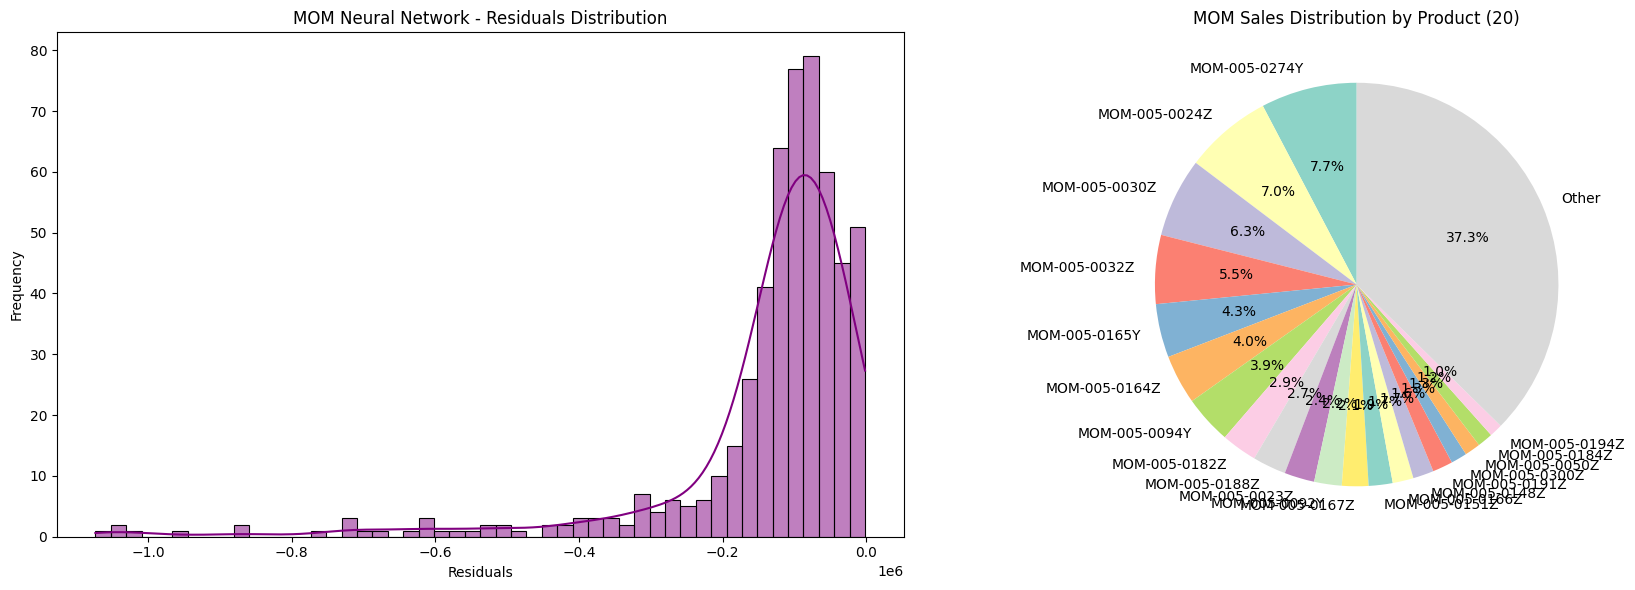

In [20]:
# Create subplots (1 row, 2 columns: one for line plot, one for residual plot)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Histogram of Residuals
sns.histplot(residuals, kde=True, color='purple', ax=axes[0])
axes[0].set_title(f'{custom_ref} Neural Network - Residuals Distribution', fontsize=12)
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')

# Pie Chart of Product Order Quantity (Top {number} + Other)
product_sales = df.groupby('ProductNumber')['OrderQuantity'].sum()  # Group by product and sum order quantities

# Get the top 20 products by sales
top_products = product_sales.nlargest(20)

# Group the remaining products as 'Other'
other_sales = product_sales.drop(top_products.index).sum()
top_products['Other'] = other_sales

# Plot the pie chart
top_products.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(top_products)))
axes[1].set_title(f'{custom_ref} Sales Distribution by Product ({len(top_products) - 1})', fontsize=12)
axes[1].set_ylabel('')  # Hide the y-label for the pie chart

plt.tight_layout()
plt.show()

In [21]:
customer_total.head()

,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,MOM-005-0018Z,2022,3,10,2,0,241.0,94500,117000.00000,117000.00000,...,105000.0,84000.0,84000.0,84000.0,94500,0,0,-100.0,NaN,0
1,MOM-005-0018Z,2022,3,13,0,0,241.0,117000,103500.00000,103500.00000,...,98500.0,81375.0,81375.0,81375.0,117000,0,0,-100.0,NaN,0
2,MOM-005-0018Z,2022,4,16,3,0,241.0,103500,75000.00000,75000.00000,...,69500.0,69500.0,69500.0,69500.0,103500,0,0,-100.0,NaN,0
3,MOM-005-0018Z,2023,10,40,3,0,241.0,75000,30000.00000,30000.00000,...,52500.0,52500.0,52500.0,52500.0,0,75000,0,inf,-100.0,0
4,MOM-005-0018Z,2024,1,2,4,0,241.0,30000,110031.53337,110031.53337,...,30000.0,30000.0,30000.0,30000.0,0,0,30000,NaN,inf,0


In [22]:
# Convert order year and month to datetime format
customer_total['OrderDate'] = pd.to_datetime(customer_total[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))

# Sort by OrderDate to maintain time order
customer_total = customer_total.sort_values(by='OrderDate')

In [23]:
customer_total.head()

,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv,OrderDate
2656,MOM-TRL-0004Z,2022,1,5,0,0,241.0,126000,110031.53337,110031.53337,...,126000.000000,126000.000000,126000.000000,126000,0,0,-100.0,NaN,0,2022-01-01
2655,MOM-TRL-0003Z,2022,1,5,0,0,241.0,157500,110031.53337,110031.53337,...,157500.000000,157500.000000,157500.000000,157500,0,0,-100.0,NaN,0,2022-01-01
2654,MOM-TRL-0001Z,2022,1,5,0,0,241.0,378000,110031.53337,110031.53337,...,378000.000000,378000.000000,378000.000000,378000,0,0,-100.0,NaN,0,2022-01-01
0,MOM-005-0018Z,2022,3,10,2,0,241.0,94500,117000.00000,117000.00000,...,84000.000000,84000.000000,84000.000000,94500,0,0,-100.0,NaN,0,2022-03-01
507,MOM-005-0044Z,2022,3,13,0,0,241.0,27000,18000.00000,18000.00000,...,26166.666667,25285.714286,25285.714286,27000,0,0,-100.0,NaN,25000,2022-03-01


In [24]:
# total_y_val.type

In [25]:
# total_y_val.type

In [26]:
# Convert order year and month to datetime format
customer_total['OrderDate'] = pd.to_datetime(customer_total[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))

# Sort by OrderDate to maintain time order
customer_total = customer_total.sort_values(by='OrderDate')

In [28]:
total_X_val.type

AttributeError: 'DataFrame' object has no attribute 'type'

In [29]:
total_y_val_pred.type

AttributeError: 'numpy.ndarray' object has no attribute 'type'

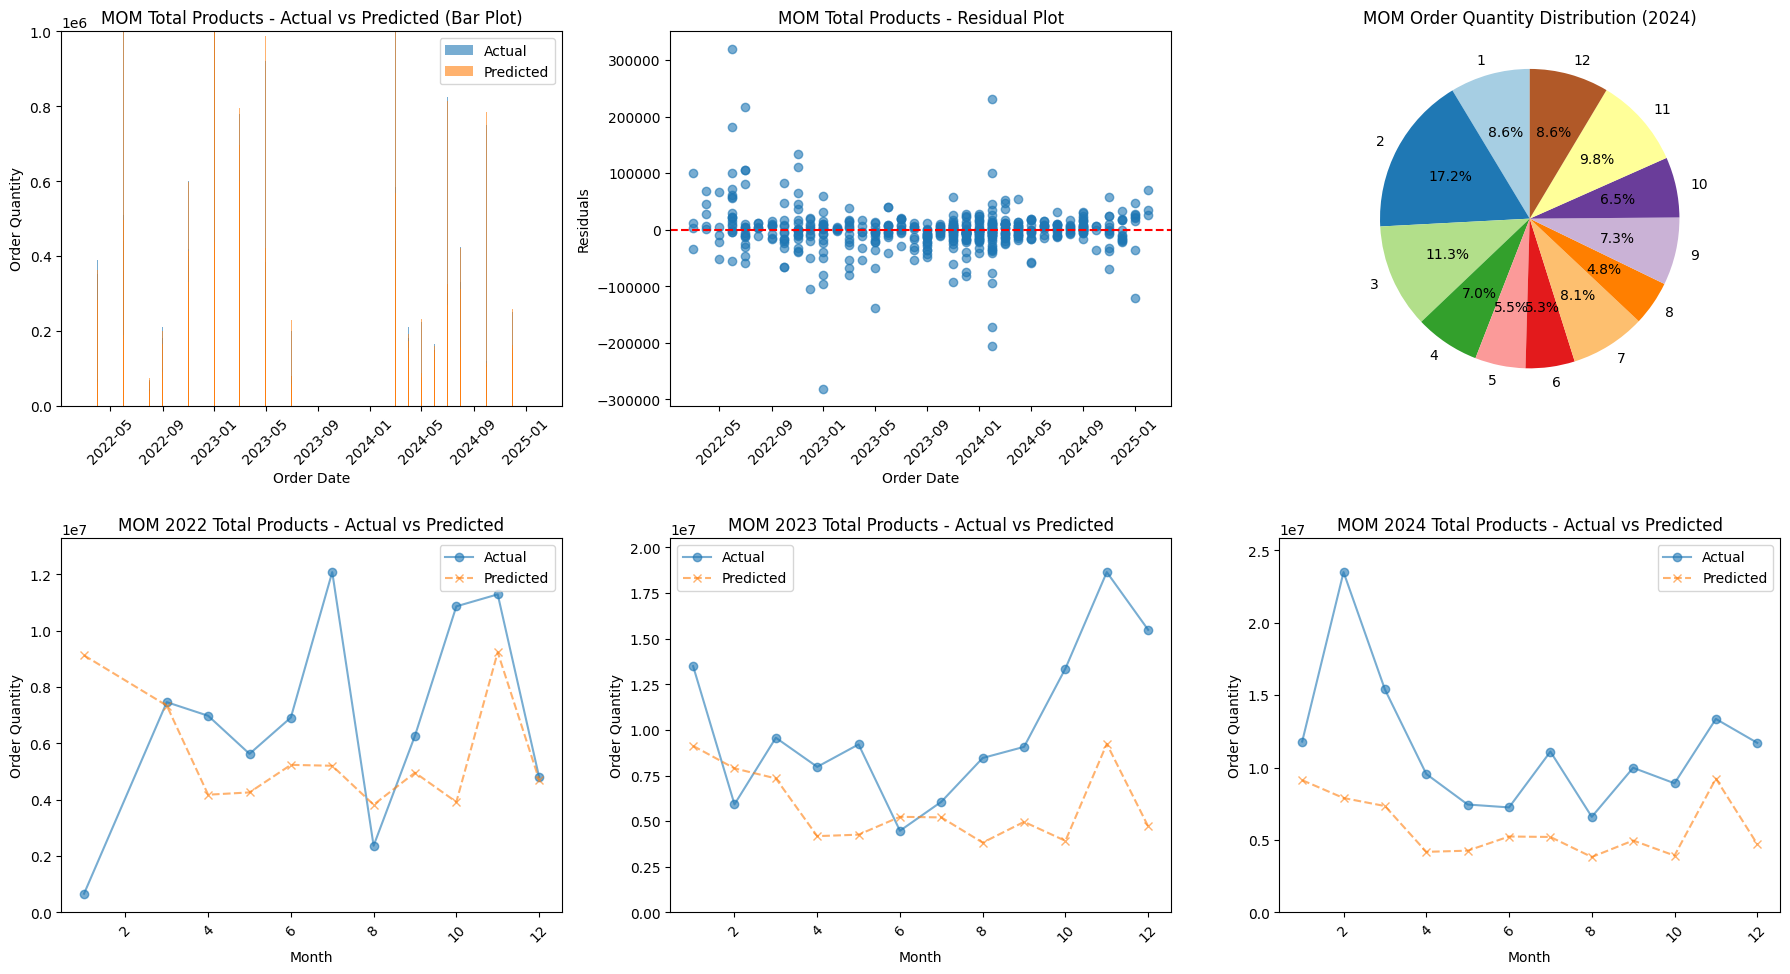

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Suppose X_val is a DataFrame, y_val is a NumPy array
# y_val_pred is also a NumPy array of predictions from your NN

# y_val_series = pd.Series(y_val, index=X_val.index)
# y_val_pred_series = pd.Series(total_y_val_pred, index=X_val.index)

# 2) Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# 3) Bar plot: Actual vs. Predicted
axes[0, 0].bar(
    customer_total.loc[total_X_val.index, 'OrderDate'], 
    total_y_val, 
    label='Actual', 
    alpha=0.6
)
axes[0, 0].bar(
    customer_total.loc[total_X_val.index, 'OrderDate'], 
    total_y_val_pred, 
    label='Predicted', 
    alpha=0.6
)
axes[0, 0].set_xlabel('Order Date')
axes[0, 0].set_ylabel('Order Quantity')
axes[0, 0].set_title(f'{custom_ref} Total Products - Actual vs Predicted (Bar Plot)')
axes[0, 0].set_ylim(0, 1_000_000)
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# 4) Residual Plot
residuals = total_y_val - total_y_val_pred
axes[0, 1].scatter(
    customer_total.loc[total_X_val.index, 'OrderDate'], 
    residuals, 
    alpha=0.6
)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Order Date')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title(f'{custom_ref} Total Products - Residual Plot')
axes[0, 1].tick_params(axis='x', rotation=45)

# 5) Pie Chart: Order Quantity Distribution (2024)
order_2024 = customer_total[customer_total['order_year'] == 2024] \
    .groupby('order_month')['OrderQuantity'].sum()
axes[0, 2].pie(
    order_2024,
    labels=order_2024.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
axes[0, 2].set_title(f'{custom_ref} Order Quantity Distribution (2024)')

# 6) Line Plots: Yearly Trends
for i, year in enumerate([2022, 2023, 2024]):  
    yearly_df = customer_total[customer_total['order_year'] == year]
    if yearly_df.empty:
        continue

    # Aggregate OrderQuantity per month
    monthly_actual = yearly_df.groupby('order_month')['OrderQuantity'].sum()

    # Convert to Pandas Series with index from customer_total
    pred_series = pd.Series(total_y_val_pred, index=total_y_val.index)

    # Group predictions by month
    monthly_predicted = pred_series.groupby(customer_total.loc[total_y_val.index, 'order_month']).sum()

    # Sort for proper plotting
    monthly_actual = monthly_actual.sort_index()
    monthly_predicted = monthly_predicted.reindex(monthly_actual.index)  # Ensure same months

    # Plot
    axes[1, i].plot(
        monthly_actual.index,
        monthly_actual,
        label='Actual',
        alpha=0.6,
        marker='o',
        linestyle='-'
    )
    axes[1, i].plot(
        monthly_predicted.index,
        monthly_predicted,
        label='Predicted',
        alpha=0.6,
        marker='x',
        linestyle='--'
    )
    axes[1, i].set_xlabel('Month')
    axes[1, i].set_ylabel('Order Quantity')
    axes[1, i].set_title(f'{custom_ref} {year} Total Products - Actual vs Predicted')
    axes[1, i].set_ylim(0, max(monthly_actual.max(), monthly_predicted.max()) * 1.1)
    axes[1, i].legend()
    axes[1, i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
